In [2]:
# please find the aforementioned 'data_raw.csv' in the 'data_raw' folder
import pandas as pd 
frame = pd.read_csv('data_raw.csv')

In [13]:
# copying frame into df 
df = frame.copy()

In [14]:
df.head()

,Prop Type,Status,S/A,Price,Yr Blt,TypeDwel,# of Kitchens,# Rms,Age,Floor Area -Grand Total,...,Realtor Remarks,Sold Price,Sold Price per SqFt,Parking Places - Total,Gross Taxes,Dist to School/School Bus,Distance to Pub/Rapid Tr,Owner Name,Protected Owner Name,No. Floor Levels
0,Residential Attached,S,Brighouse,"$438,000",2008.0,APTU,1.0,5.0,12.0,559,...,Parking #24 on P2. No locker. Please sign & ...,"$438,000",$783.54,1.0,"$1,394.74",Close,Close,XIAO DAN WANG,NaN,1.0
1,Residential Attached,S,West Central,"$438,000",1999.0,APTU,1.0,7.0,21.0,"1,248",...,Touchbase for booking appts. Ensure your clien...,"$438,000",$350.96,1.0,"$2,542.73",NaN,1/2 BLOCK,Michael Zamprogno & Jade Werger,NaN,1.0
2,Residential Attached,S,Collingwood VE,"$438,000",1992.0,APTU,1.0,5.0,29.0,672,...,"All measurements are approximate only, Buyer t...","$438,000",$651.79,1.0,"$1,001.26",NaN,NaN,**Privacy Protected**,NaN,1.0
3,Residential Attached,A,Brighouse,"$438,000",1971.0,APTU,1.0,5.0,50.0,804,...,L/S has key to show anytime. Outdoor parking #285,NaN,NaN,1.0,"$1,080.07",2 block,One block,"Paul Wing Ming Pi, Glara Ming Pi",NaN,1.0
4,Residential Attached,S,West End VW,"$438,000",1984.0,APTU,1.0,5.0,36.0,552,...,"Measurements and Sq. ft are approx, via SP, an...","$438,000",$793.48,1.0,"$1,399.54",NaN,NaN,**Privacy Protected**,NaN,1.0


In [15]:
# changing price to int
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(int)

<ipython-input-15-0a99670e0fa7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [16]:
# changing floor area to float
df['Floor Area -Grand Total'] = df['Floor Area -Grand Total'].str.replace(',', '')
df['Floor Area -Grand Total'] = df['Floor Area -Grand Total'].astype(float)

In [17]:
# changing lot size to float
df['Lot Sz (Sq.Ft.)'] = df['Lot Sz (Sq.Ft.)'].str.replace(',', '')
df['Lot Sz (Sq.Ft.)'] = df['Lot Sz (Sq.Ft.)'].astype(float)

<AxesSubplot:>

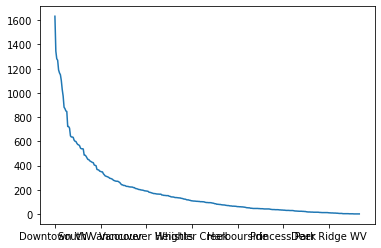

In [22]:
#checking the distribution of values within S/A
import matplotlib.pyplot as plt
df['S/A'].value_counts().plot()

In [125]:
df['S/A'].value_counts()

Downtown VW          1633
Brighouse            1345
Kitsilano            1271
Metrotown            1268
Yaletown             1190
                     ... 
Ivey Lake Estates       1
Squamish Rural          1
Function Junction       1
Westham Island          1
Spruce Grove            1
Name: S/A, Length: 333, dtype: int64

In [38]:
#cleaning up Prop Type
def transform_prop(x):
  if x == 'Residential Attached':
    return x
  elif x == 'Residential Detached':
    return x 
  else: 
    return 'other'

df['Prop Type'] =  df['Prop Type'].apply(lambda x: transform_prop(x) )

In [72]:
df['Prop Type'].value_counts()

Residential Attached    38715
Residential Detached    22267
Name: Prop Type, dtype: int64

In [28]:
# dropping Status column
df = df.drop('Status', axis=1)

In [34]:
# cleaning up type of dwelling
def transform_type(x):
  if x == 'HOUSE':
    return x
  elif x == 'APTU':
    return x 
  elif x == 'TWNHS':
    return x 
  else:
    return 'OTHER'

In [35]:
df['TypeDwel'] =  df['TypeDwel'].apply(lambda x: transform_type(x) )


In [37]:
df['TypeDwel'].value_counts()

APTU     27101
HOUSE    21418
TWNHS    10026
OTHER     3473
Name: TypeDwel, dtype: int64

In [42]:
# checking to see number of values within Area
df['Area'].value_counts()

Vancouver West         11056
Richmond                7354
Vancouver East          7217
North Vancouver         5174
Coquitlam               5132
Maple Ridge             3777
Burnaby North           3281
Burnaby South           3252
New Westminster         2504
Port Coquitlam          1976
West Vancouver          1872
Sunshine Coast          1630
Port Moody              1499
Squamish                1222
Tsawwassen              1160
Whistler                1012
Ladner                   846
Burnaby East             739
Pitt Meadows             660
Pemberton                276
Islands-Van. & Gulf      178
Bowen Island             165
Out of Town               33
VAN Fake Area              3
Name: Area, dtype: int64

In [120]:
# figure out what to do with zoning 
df.Zoning.value_counts()

CD-1      4580
RS-1      3948
CD        3487
RS1       2701
RES       2105
          ... 
CD 149       1
ZUM5         1
CD251        1
RM-45        1
RE1/B        1
Name: Zoning, Length: 2235, dtype: int64

In [155]:
zone_list

['FCCDD',
 'C',
 'M',
 'RS',
 'RT',
 'RM',
 'RA',
 'I',
 'MC',
 'HA',
 'DD',
 'BCPED',
 'IC',
 'FC',
 'DEOD',
 'FSHCA',
 'FM',
 'CWD']

In [154]:
# Removing CD from zone_list
zone_list.remove('CD')

In [172]:
# function that cleans up zoning column in the dataset
def change_zone_code(x):
    if 'CD' in x:
        return 'CD'
    elif 'MC' in x:
        return 'MC'
    elif 'C' in x:
        return 'C'
    elif 'M' in x:
        return 'M'
    elif 'RS' in x:
        return 'RS'
    elif 'RT' in x:
        return 'RT'
    elif 'RM' in x:
        return 'RM'
    elif 'RA' in x:
        return 'RA'
    elif 'I' in x:
        return 'I'
    elif 'HA' in x:
        return 'HA'
    elif 'DD' in x:
        return 'DD'
    elif 'BCPED' in x:
        return 'BCPED'
    elif 'IC' in x:
        return 'IC'
    elif 'FC' in x:
        return 'FC'
    elif 'DEOD' in x:
        return 'DEOD'
    elif 'DEOD' in x:
        return 'DEOD'
    elif 'FSHCA' in x:
        return 'FSHCA'
    elif 'FM' in x:
        return 'FM'
    elif 'CWD' in x:
        return 'CWD'
    else:
        return 'other'

df['Zoning changed'] = df['Zoning'].apply(lambda x: change_zone_code(str(x)))

In [174]:
df['Zoning changed'].value_counts()

RS       13265
other    13252
CD       12123
M        11891
C         3870
RT        3158
RA        2049
DD         927
HA         227
I          157
MC          53
DEOD        10
Name: Zoning changed, dtype: int64

In [163]:
test_list = (df['Zoning'].unique()[:100])

In [166]:
df.Zoning.str.contains('CD').value_counts()

False    48700
True     12123
Name: Zoning, dtype: int64

In [145]:
# reading zoning labels from City of Vancouver dataset
zoning = pd.read_csv('zoning-districts-and-labels.csv', delimiter=';')
zoning.head()
zoning['Zoning Category'].value_counts()

CD       747
RM       177
C        177
RT       123
RS       101
I         30
M         29
IC         9
BCPED      7
DD         6
HA         5
MC         5
FC         3
FCCDD      3
RA         2
FSHCA      1
FM         1
CWD        1
DEOD       1
Name: Zoning Category, dtype: int64

In [144]:
zoning.head()

,Geom,Object ID,Zoning Classification,Zoning Category,Zoning District,CD-1 Number,geo_point_2d
0,"{""type"": ""Polygon"", ""coordinates"": [[[-123.132...",20027,Comprehensive Development,FCCDD,FCCDD,NaN,"49.2763074687,-123.132361868"
1,"{""type"": ""Polygon"", ""coordinates"": [[[-123.124...",20030,Comprehensive Development,CD,CD-1 (546),546,"49.2799694579,-123.123419502"
2,"{""type"": ""Polygon"", ""coordinates"": [[[-123.115...",20033,Comprehensive Development,CD,CD-1 (555),555,"49.2856413694,-123.115879352"
3,"{""type"": ""Polygon"", ""coordinates"": [[[-123.062...",20034,Comprehensive Development,CD,CD-1 (556),556,"49.2428535279,-123.061590121"
4,"{""type"": ""Polygon"", ""coordinates"": [[[-123.134...",20038,Commercial,C,C-5A,NaN,"49.2904798478,-123.133776581"


In [146]:
zone = zoning[['Zoning Classification', 'Zoning Category']]

In [148]:
zone['Zoning Classification'].value_counts()

Comprehensive Development    765
Commercial                   180
Multiple Dwelling            178
Two-Family Dwelling          123
One-Family Dwelling          101
Industrial                    73
Historical Area                5
Limited Agriculture            2
Other                          1
Name: Zoning Classification, dtype: int64

In [152]:
zone_list = list(zone['Zoning Category'].unique())

In [47]:
# cleaning up type 
def transform_house_type(x):
    if x == 'Apartment/Condo':
        return x
    elif  x == 'House/Single Family':
        return x
    elif x == 'Townhouse':
        return x 
    else:
        return 'other'
    
df['Type'] = df['Type'].apply(lambda x: transform_house_type(x))

In [48]:
df['Type'].value_counts()

Apartment/Condo        27101
House/Single Family    21418
Townhouse              10026
other                   3473
Name: Type, dtype: int64

In [50]:
# dropping class (it's a replicate of Prop Type)
df = df.drop('Class', axis=1)

In [52]:
# transforming list date into datetime object
df['List Date'] = pd.to_datetime(df['List Date'])

In [56]:
# filling missing values in View with No 
df['View'] = df['View'].fillna('No')
df['View'].value_counts()

No     32094
Yes    29924
Name: View, dtype: int64

In [61]:
# drop VOW Comment ( since it is filled with  NO)
df = df.drop('VOW Comment', axis=1)

In [70]:
# dropping all 'other' frame in Prop Type since they have too many missing values for all columns 
df = df[df['Prop Type'] != 'other']

In [73]:
# dropping a bunch of columns due to too many missing values 
df = df.drop(['Agent Hit Count', 'Approx.Yr of Renos/Addns', 'Fire Sprinkler System', 'Flood Plain','Neighborhood Code','Protected Owner Name','Internet Remarks' ], axis = 1)

In [129]:
df.isna().sum()


Prop Type                                0
S/A                                      0
Price                                    0
Yr Blt                                   1
TypeDwel                                 0
# of Kitchens                            0
# Rms                                    0
Age                                      1
Floor Area -Grand Total                  0
Area                                     0
Zoning                                 159
Type                                     0
Total Bedrooms                           0
Total Baths                              0
Days On Market                           0
List Date                                0
Lot Sz (Sq.Ft.)                        399
View                                     0
Fireplaces                              32
List Price                               0
Public Remarks                         223
Realtor Remarks                        860
Sold Price per SqFt                  10104
Parking Pla

In [77]:
# please skip past the next two blocks since the dataset has been cleared of these two fields in the secured version
df['Broker Reciprocity'].value_counts()

Y    60549
N      433
Name: Broker Reciprocity, dtype: int64

In [78]:
# dropping Broker Reciprocity since it is overwhelmmingly yes 
df = df.drop('Broker Reciprocity', axis=1)

In [84]:
# dropping commission since they are pretty much the same thing
df = df.drop('Commission', axis=1)

In [86]:
df['Dwelling Classification'].value_counts()

Attached    38715
Detached    22267
Name: Dwelling Classification, dtype: int64

In [87]:
# dropping dwelling classification(duplicate values)

df = df.drop(['Dwelling Classification'], axis=1)

In [89]:
df['Fireplaces'].value_counts()

1.0     27045
0.0     22844
2.0      8983
3.0      1576
4.0       380
5.0        79
6.0        21
7.0        12
11.0        4
12.0        2
8.0         1
9.0         1
20.0        1
10.0        1
Name: Fireplaces, dtype: int64

In [94]:
# changing list price to int
df['List Price'] = df['List Price'].str.replace(',', '')
df['List Price'] = df['List Price'].str.replace('$', '')
df['List Price'] = df['List Price'].astype(int)

<ipython-input-94-50e54cfa3c11>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['List Price'] = df['List Price'].str.replace('$', '')


In [101]:
# dropping sold price since it duplicates price 
#df = df.drop('Sold Price', axis=1)

In [104]:
#filling parking places 
df['Parking Places - Total'] = df['Parking Places - Total'].fillna(0)

In [103]:
df['Parking Places - Total'].value_counts()

1.0     24382
2.0     15196
4.0      6476
3.0      3534
6.0      2750
5.0      1519
0.0       631
8.0       612
10.0      338
7.0       323
9.0        95
12.0       67
20.0       38
11.0       14
15.0       14
16.0        9
30.0        8
14.0        5
13.0        5
40.0        4
25.0        2
32.0        2
97.0        1
36.0        1
23.0        1
98.0        1
18.0        1
50.0        1
22.0        1
60.0        1
28.0        1
31.0        1
Name: Parking Places - Total, dtype: int64

In [108]:
# changing gross taxes to float
df['Gross Taxes'] = df['Gross Taxes'].str.replace(',', '')
df['Gross Taxes'] = df['Gross Taxes'].str.replace('$', '')
df['Gross Taxes'] = df['Gross Taxes'].astype(float)

<ipython-input-108-aec40a6463d4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Gross Taxes'] = df['Gross Taxes'].str.replace('$', '')


In [110]:
df['Gross Taxes'].describe()

count    6.094900e+04
mean     3.857471e+03
std      8.543548e+03
min      0.000000e+00
25%      1.822170e+03
50%      2.856400e+03
75%      4.775000e+03
max      1.035275e+06
Name: Gross Taxes, dtype: float64

In [112]:
df['Gross Taxes'] = df['Gross Taxes'].fillna(df['Gross Taxes'].mean())

In [115]:
# filling in owner name
df['Owner Name'] = df['Owner Name'].fillna('Unknown')

In [135]:
# fill dist to school nan with not close
df['Dist to School/School Bus'] = df['Dist to School/School Bus'].fillna('Not Close')

In [137]:
# figure out what to do with distance to school/public transport

def transform_school_dist(x):
    if x == 'Not Close':
       
        return 'Not Close'
         
    else:
        return 'Close'

df['Dist to School/School Bus changed'] = df['Dist to School/School Bus'].apply(lambda x: transform_school_dist(x))

In [138]:
df['Dist to School/School Bus changed'].value_counts()

Not Close    33568
Close        27414
Name: Dist to School/School Bus changed, dtype: int64

In [139]:
# apply the same function for school distance to public transport distance 
df['Distance to Pub/Rapid Tr'] = df['Distance to Pub/Rapid Tr'].fillna('Not Close')
df['Distance to Pub/Rapid Tr changed'] = df['Distance to Pub/Rapid Tr'].apply(lambda x: transform_school_dist(x))

In [140]:
df['Distance to Pub/Rapid Tr changed'].value_counts()

Close        33114
Not Close    27868
Name: Distance to Pub/Rapid Tr changed, dtype: int64

In [141]:
df = df.drop(['Distance to Pub/Rapid Tr', 'Dist to School/School Bus'], axis=1)

In [143]:
df['Area'].value_counts()

Vancouver West         11013
Richmond                7291
Vancouver East          7162
North Vancouver         5133
Coquitlam               5067
Maple Ridge             3639
Burnaby North           3243
Burnaby South           3226
New Westminster         2478
Port Coquitlam          1952
West Vancouver          1830
Sunshine Coast          1475
Port Moody              1463
Tsawwassen              1150
Squamish                1141
Whistler                 964
Ladner                   834
Burnaby East             731
Pitt Meadows             653
Pemberton                234
Bowen Island             136
Islands-Van. & Gulf      133
Out of Town               31
VAN Fake Area              3
Name: Area, dtype: int64

In [208]:
df.dtypes

Prop Type                                       object
S/A                                             object
Price                                            int32
Yr Blt                                         float64
TypeDwel                                        object
# of Kitchens                                  float64
# Rms                                          float64
Age                                            float64
Floor Area -Grand Total                        float64
Area                                            object
Zoning                                          object
Type                                            object
Total Bedrooms                                 float64
Total Baths                                    float64
Days On Market                                   int64
List Date                               datetime64[ns]
Lot Sz (Sq.Ft.)                                float64
View                                            object
Fireplaces

In [183]:
# checking out what kind of realtor remarks there are 
df['Realtor Remarks'][20]

'Please include the attached team disclosure with all offers. Total sq ft from strata plan, interior from Realtor, buyer to verify if important. One dog and one cat or two cats. Dog cannot exceed 18 at the shoulder.'

In [185]:
# checking out what kind of public remarks there are 
df['Public Remarks'][10]

'Totally renovated 1-bed in Mount Pleasant just by China Creek North Park, VCC-Clark SkyTrain, Emily Carr, Main Street, and more! New flooring, new lighting, new cabinetry, new countertops, new appliances. Modern open kitchen offers tons of counter space and storage, plus eating area. Massive 185SF balcony offers views of the North Shore mountains and is perfect for gardening, relaxing, or entertaining. Heat and hot water included in strata fee. Fully equipped gym and sauna in the building. Unit comes with parking and locker. Rentals ok and not at max. One dog or one cat.'

In [191]:
!pip install vaderSentiment

In [188]:
import vader

In [192]:
# initiating vader sentiment analyzer for sentiment analysis on realtor and public remarks 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [194]:
# please skip next blocks concerning 'realtor remark' since the dataset has been cleared of these two fields in the secured version
df['Realtor remarks sentiment'] = df['Realtor Remarks'].apply(lambda x: analyzer.polarity_scores(str(x)))

In [201]:
df['Realtor remarks sentiment'][2]

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.8074}

In [202]:
df['Realtor Remarks'][2]

'All measurements are approximate only, Buyer to verify if deemed important. Total sqft from strata plan. Vacant unit, easy showings. All Showings must comply with Covid Protocol.  Please sign & email COVIC Access waiver form prior to showing. Please wear masks and gloves.'

In [205]:
# turning sentiment results into categorical column
def sentiment(x):
    if x['compound'] >= 0:
        return 'positive'
    elif x['compound'] == 0:
        return 'neutral'
    else:
        return 'negative'

df['Realtor remarks sentiment classified'] = df['Realtor remarks sentiment'].apply(lambda x: sentiment(x))

In [207]:
df['Realtor remarks sentiment classified'].value_counts()

positive    53948
negative     7034
Name: Realtor remarks sentiment classified, dtype: int64

In [209]:
df['Public remarks sentiment'] = df['Public Remarks'].apply(lambda x: analyzer.polarity_scores(str(x)))

In [210]:
df['Public remarks sentiment classified'] = df['Public remarks sentiment'].apply(lambda x: sentiment(x))

In [211]:
df['Public remarks sentiment classified'].value_counts()

positive    60596
negative      386
Name: Public remarks sentiment classified, dtype: int64

In [212]:
df.head()

,Prop Type,S/A,Price,Yr Blt,TypeDwel,# of Kitchens,# Rms,Age,Floor Area -Grand Total,Area,...,Gross Taxes,Owner Name,No. Floor Levels,Dist to School/School Bus changed,Distance to Pub/Rapid Tr changed,Zoning changed,Realtor remarks sentiment,Realtor remarks sentiment classified,Public remarks sentiment,Public remarks sentiment classified
0,Residential Attached,Brighouse,438000,2008.0,APTU,1.0,5.0,12.0,559.0,Richmond,...,1394.74,XIAO DAN WANG,1.0,Close,Close,CD,"{'neg': 0.114, 'neu': 0.823, 'pos': 0.063, 'co...",negative,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",positive
1,Residential Attached,West Central,438000,1999.0,APTU,1.0,7.0,21.0,1248.0,Maple Ridge,...,2542.73,Michael Zamprogno & Jade Werger,1.0,Not Close,Close,other,"{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compou...",positive,"{'neg': 0.035, 'neu': 0.828, 'pos': 0.138, 'co...",positive
2,Residential Attached,Collingwood VE,438000,1992.0,APTU,1.0,5.0,29.0,672.0,Vancouver East,...,1001.26,**Privacy Protected**,1.0,Not Close,Not Close,CD,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",positive,"{'neg': 0.072, 'neu': 0.781, 'pos': 0.147, 'co...",positive
3,Residential Attached,Brighouse,438000,1971.0,APTU,1.0,5.0,50.0,804.0,Richmond,...,1080.07,"Paul Wing Ming Pi, Glara Ming Pi",1.0,Close,Close,I,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",positive,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",positive
4,Residential Attached,West End VW,438000,1984.0,APTU,1.0,5.0,36.0,552.0,Vancouver West,...,1399.54,**Privacy Protected**,1.0,Not Close,Not Close,M,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",positive,"{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'comp...",positive


In [213]:
df.columns

Index(['Prop Type', 'S/A', 'Price', 'Yr Blt', 'TypeDwel', '# of Kitchens',
       '# Rms', 'Age', 'Floor Area -Grand Total', 'Area', 'Zoning', 'Type',
       'Total Bedrooms', 'Total Baths', 'Days On Market', 'List Date',
       'Lot Sz (Sq.Ft.)', 'View', 'Fireplaces', 'List Price', 'Public Remarks',
       'Realtor Remarks', 'Sold Price per SqFt', 'Parking Places - Total',
       'Gross Taxes', 'Owner Name', 'No. Floor Levels',
       'Dist to School/School Bus changed', 'Distance to Pub/Rapid Tr changed',
       'Zoning changed', 'Realtor remarks sentiment',
       'Realtor remarks sentiment classified', 'Public remarks sentiment',
       'Public remarks sentiment classified'],
      dtype='object')

In [214]:
# this dataset perserves the original words in the realtor and public remarks
df.to_csv('df.csv')

In [215]:
df_short = df.copy()

In [217]:
df_short.dtypes

Prop Type                                       object
S/A                                             object
Price                                            int32
Yr Blt                                         float64
TypeDwel                                        object
# of Kitchens                                  float64
# Rms                                          float64
Age                                            float64
Floor Area -Grand Total                        float64
Area                                            object
Zoning                                          object
Type                                            object
Total Bedrooms                                 float64
Total Baths                                    float64
Days On Market                                   int64
List Date                               datetime64[ns]
Lot Sz (Sq.Ft.)                                float64
View                                            object
Fireplaces

In [218]:
df_short = df_short.drop(['Realtor remarks sentiment','Public remarks sentiment','Public Remarks', 'Realtor Remarks'], axis=1)

In [220]:
# this dataset is intended for trainning and validating on models
df_short.to_csv('df_short.csv')